In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("*****************************")
print("|*|Data Retrieval Complete|*|")
print("*****************************")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san antonio de pale
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | kristiansund
Processing Record 4 of Set 1 | yarovoye
Processing Record 5 of Set 1 | zakamensk
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | nambucca heads
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | vorkuta
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | tyukhtet
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | ayaguz
City not found. Skipping...
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | polonne
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | naze
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | mogocha
Processin

In [4]:
 # Convert the cities weather data into a DF
city_data_df = pd.DataFrame(city_data)

# Show record count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
 # Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san antonio de pale,-1.4014,5.6325,25.71,79,100,6.13,GQ,1685417879
1,papatowai,-46.5619,169.4708,8.24,90,100,6.08,NZ,1685417880
2,kristiansund,63.1115,7.7320,9.03,93,100,7.72,NO,1685417880
3,yarovoye,52.9273,78.5800,18.08,42,0,5.29,RU,1685417641
4,zakamensk,50.3741,103.2863,17.75,37,100,4.30,RU,1685417880


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,25.71,79,100,6.13,GQ,1685417879
1,papatowai,-46.5619,169.4708,8.24,90,100,6.08,NZ,1685417880
2,kristiansund,63.1115,7.7320,9.03,93,100,7.72,NO,1685417880
3,yarovoye,52.9273,78.5800,18.08,42,0,5.29,RU,1685417641
4,zakamensk,50.3741,103.2863,17.75,37,100,4.30,RU,1685417880


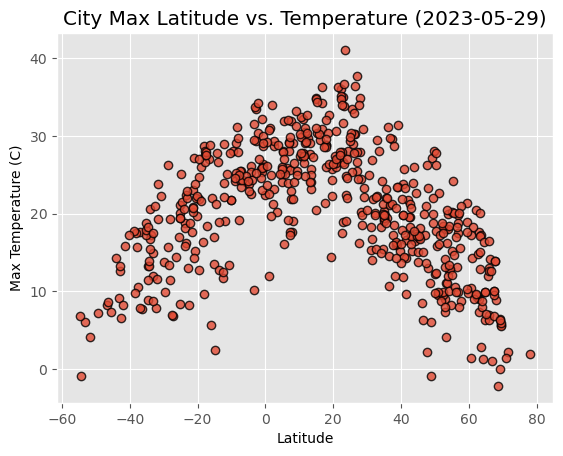

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.style.use('ggplot')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/MaxLat_vs_Temp.png")

# Show plot
plt.show()

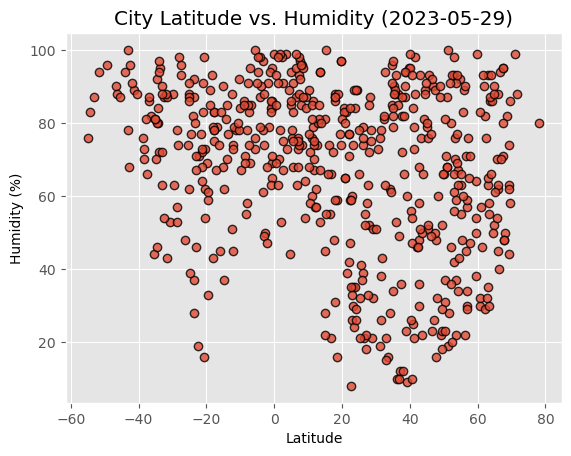

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_vs_Humidity.png")

# Show plot
plt.show()

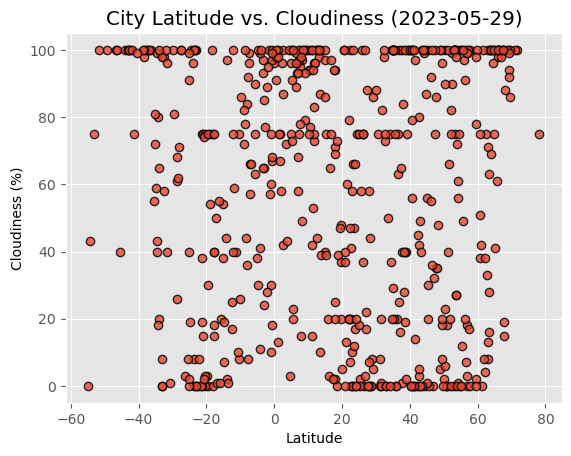

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_vs_Clouds.png")

# Show plot
plt.show()

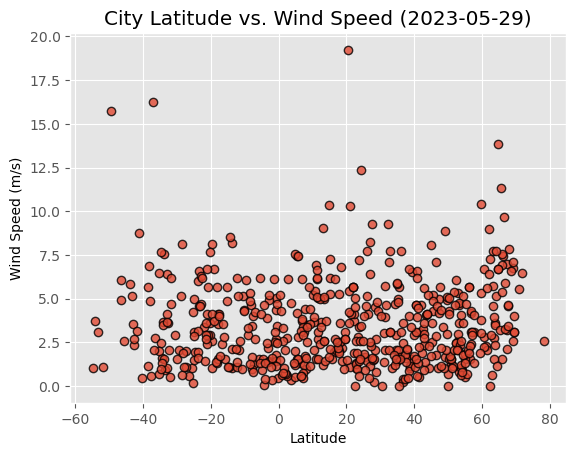

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_vs_Wind.png")

# Show plot
plt.show()

In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [15]:
 # Create a DF with the northern hemisphere data
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kristiansund,63.1115,7.7320,9.03,93,100,7.72,NO,1685417880
3,yarovoye,52.9273,78.5800,18.08,42,0,5.29,RU,1685417641
4,zakamensk,50.3741,103.2863,17.75,37,100,4.30,RU,1685417880
5,bilibino,68.0546,166.4372,8.85,50,88,7.85,RU,1685417880
9,vorkuta,67.5000,64.0000,10.12,95,100,3.19,RU,1685417881


In [16]:
 # Create a DF with the southern hemisphere data
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,25.71,79,100,6.13,GQ,1685417879
1,papatowai,-46.5619,169.4708,8.24,90,100,6.08,NZ,1685417880
6,waitangi,-43.9535,-176.5597,14.34,94,100,5.81,NZ,1685417880
7,nambucca heads,-30.6500,153.0000,22.32,53,1,2.93,AU,1685417880
8,edinburgh of the seven seas,-37.0676,-12.3116,17.60,86,100,16.23,SH,1685417881


The r-value is: 0.5488068764329367


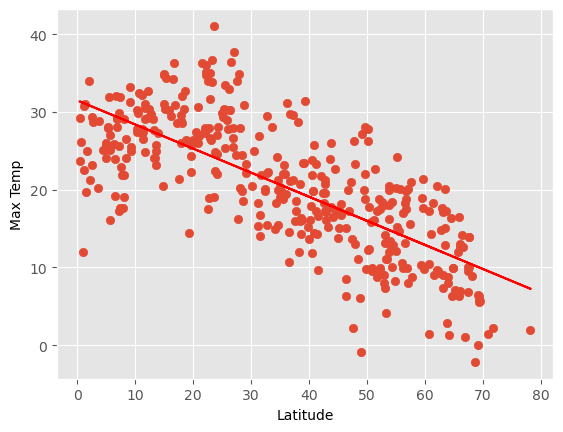

In [17]:
# LinRegress on northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))

In [ ]:
# R values ~ 0.5 indicate that there is a moderate positive correlation.

The r-value is: 0.5220333281223224


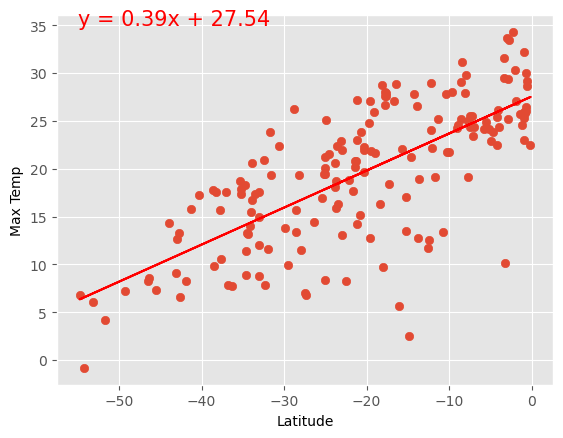

In [18]:
 # LinRegress on southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

In [ ]:
# R values ~ 0.5 indicate that there is a moderate positive correlation.

The r-value is: 0.024951582266113898


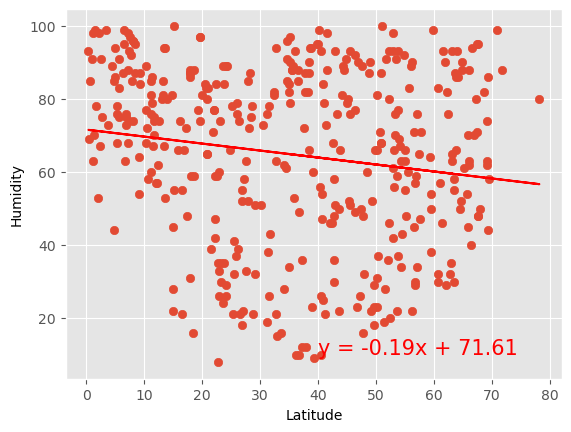

In [19]:
# northern hemisphere humidity LinRegress
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

In [ ]:
# The low r values indicate a weak to no relationship between humidity and latitude.

The r-value is: 0.0035349550158363025


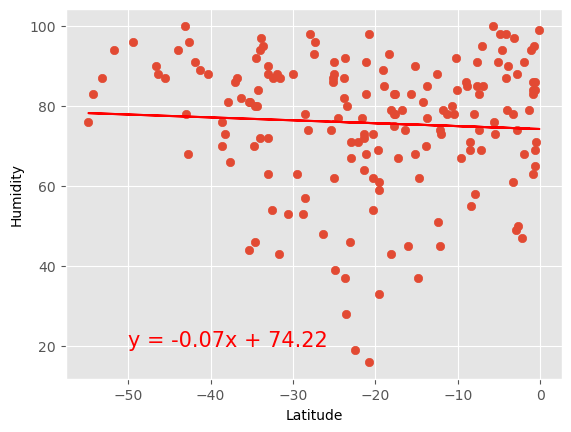

In [20]:
# southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

In [ ]:
# The low r values indicate a weak to no relationship between humidity and latitude.

The r-value is: 0.0010144984714331542


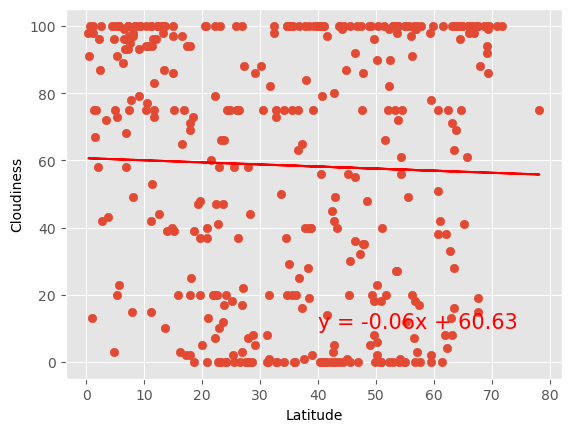

In [21]:
# northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

In [ ]:
# The low r values indicate a weak positive relationship between latitude and cloudiness.

The r-value is: 0.014238628085381544


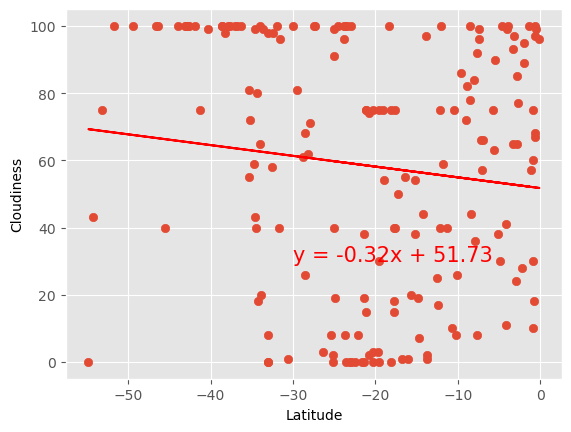

In [22]:
 # southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

In [ ]:
# The low r values indicate a weak positive relationship between latitude and cloudiness.

The r-value is: 0.014295914168502552


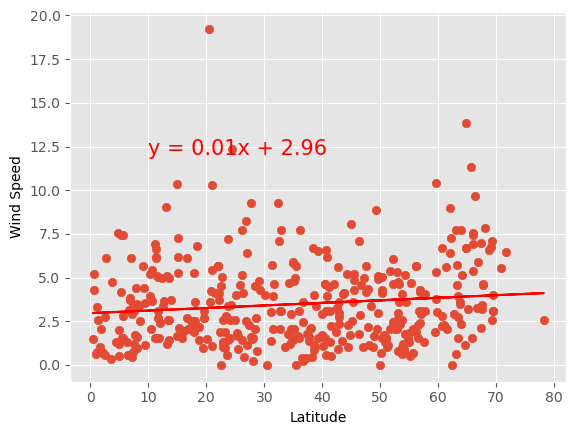

In [23]:
# northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

In [ ]:
# The low r values indicate that there is no real relationship between wind speed and latitude.

The r-value is: 0.030651131804903555


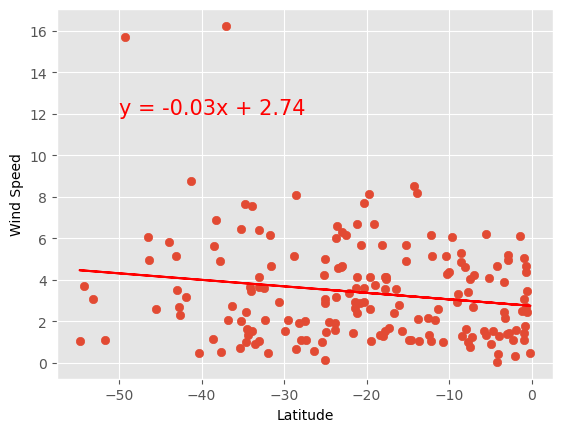

In [24]:
# southern hemi
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

In [25]:
# The low r values indicate that there is no real relationship between wind speed and latitude.